## **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

## 3. Interpolation and Blending

 Importing necessary libraries/modules and functions

In [2]:
% matplotlib inline
% pprint off

# Import the library as show images, plot, etc.
import matplotlib.pyplot as plt
# Import functionality for the color map
import matplotlib.cm as cm

# Import system specific parameters and function
import sys 

## Other plotting libraries
# import seaborn as sns

# Import the library to mange the matrix and array 
import numpy as np

# Importing image processing toolbox 
## Module to read, write,... 
from skimage import io
## Module to convert the image on 8 bits
from skimage import img_as_ubyte
## Module to convert the image to float
from skimage import img_as_float
## Module for color conversion 
from skimage import color
## Module image transform from skimage for resize 
from skimage import transform
## Module misc from scipy for resize 
from scipy import misc
## Module util from skimage 
from PIL import Image


Pretty printing has been turned OFF


### 3.1  Resizing an image size using different interpolation functions

** Q.1 Resize the `lena` or `vibot` image using nearest, bilinear and bicubic function.** 

You can define your function which accept the model and resize size from the user or just run a script.

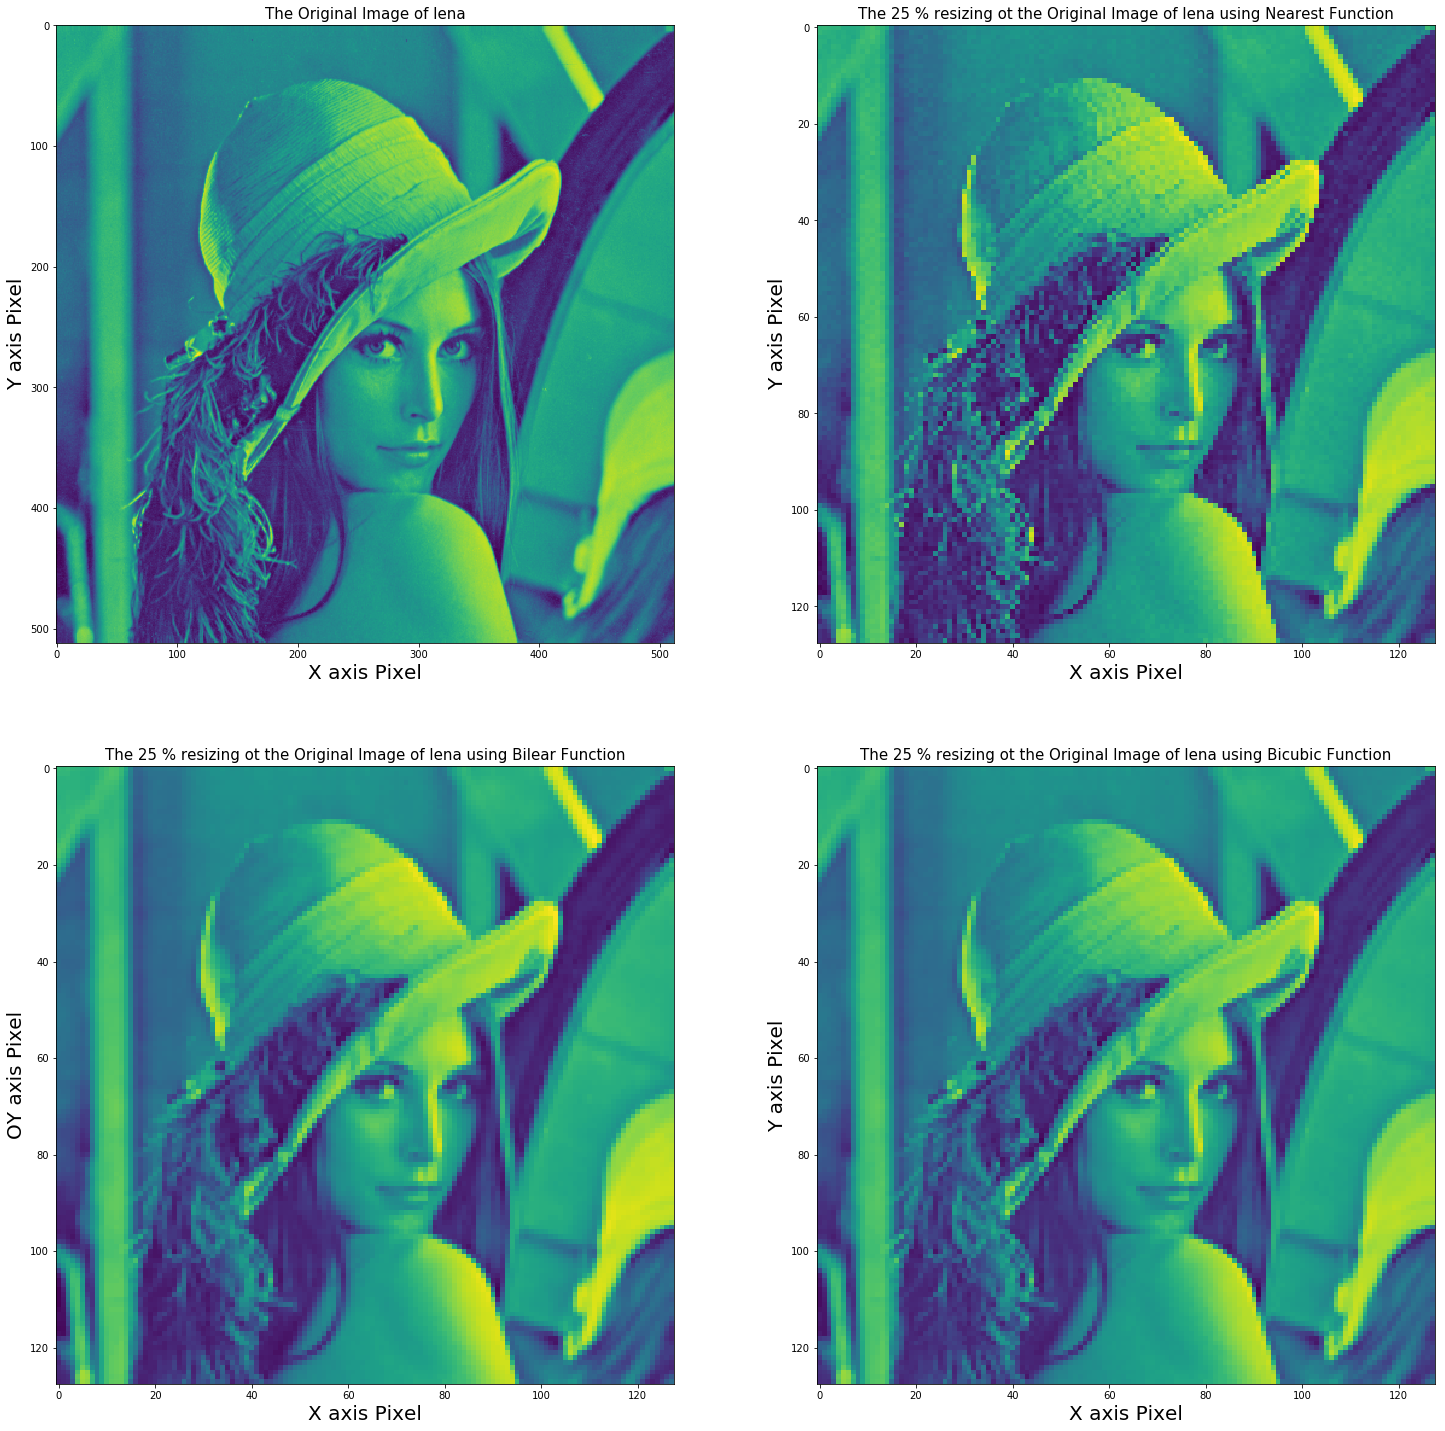

In [3]:
#Define a function that take the image, percentage of resizing and model as a input arguments
def imageresize (images, resize_percentage, resizing_Model):
    your_output = misc.imresize(images, resize_percentage, interp=resizing_Model, mode=None)
    return your_output

#import of the lena's image from the devices
img_path = './images/'
img_name = 'lena-grey.bmp'
lena_grey_path = img_path.__add__(img_name)
lena_grey = io.imread(lena_grey_path)

#Declaration of the subplot to visualize the images after and before  resizing
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(25, 25))
ax0, ax1, ax2, ax3 = axes.ravel()

#transformation function is calling for resizing
im_nearest = imageresize (lena_grey, 25, 'nearest')
im_bilinear = imageresize (lena_grey, 25, 'bilinear')
im_bicubic = imageresize (lena_grey, 25, 'bicubic')

#showing of the input and output resized images
ax0.imshow(lena_grey)
ax1.imshow(im_nearest)
ax2.imshow(im_bilinear)
ax3.imshow(im_bicubic)

#define axis and title of the output images
ax0.set_title('The Original Image of lena',fontsize=15)
ax1.set_title('The 25 % resizing ot the Original Image of lena using Nearest Function',fontsize=15)
ax2.set_title('The 25 % resizing ot the Original Image of lena using Bilear Function',fontsize=15)
ax3.set_title('The 25 % resizing ot the Original Image of lena using Bicubic Function',fontsize=15)

#setting the axis of the images 
ax0.set_xlabel('X axis Pixel',fontsize=20)
ax0.set_ylabel('Y axis Pixel',fontsize=20)
ax1.set_xlabel('X axis Pixel',fontsize=20)
ax1.set_ylabel('Y axis Pixel',fontsize=20)
ax2.set_xlabel('X axis Pixel',fontsize=20)
ax2.set_ylabel('OY axis Pixel',fontsize=20)
ax3.set_xlabel('X axis Pixel',fontsize=20)
ax3.set_ylabel('Y axis Pixel',fontsize=20)

**Q.2 Write three functions that performs `simple_blend`, `alpha_blend` and `pyramid_blend`**

** Using your functions, blend `orange` and `apple` images together.**


(60,)


C:\Users\MKH\Anaconda3\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


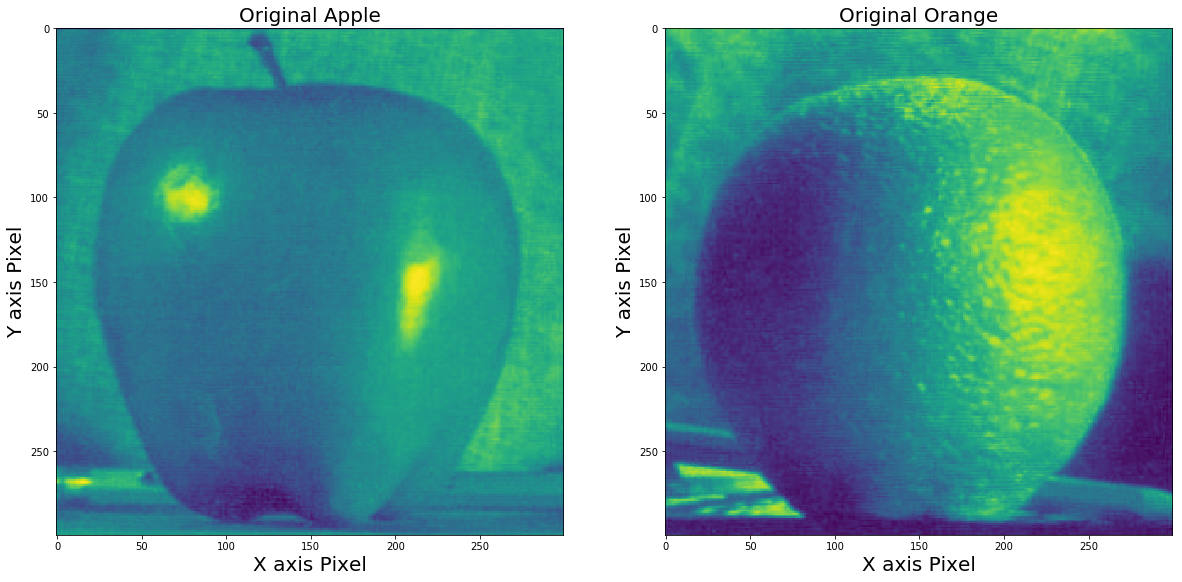

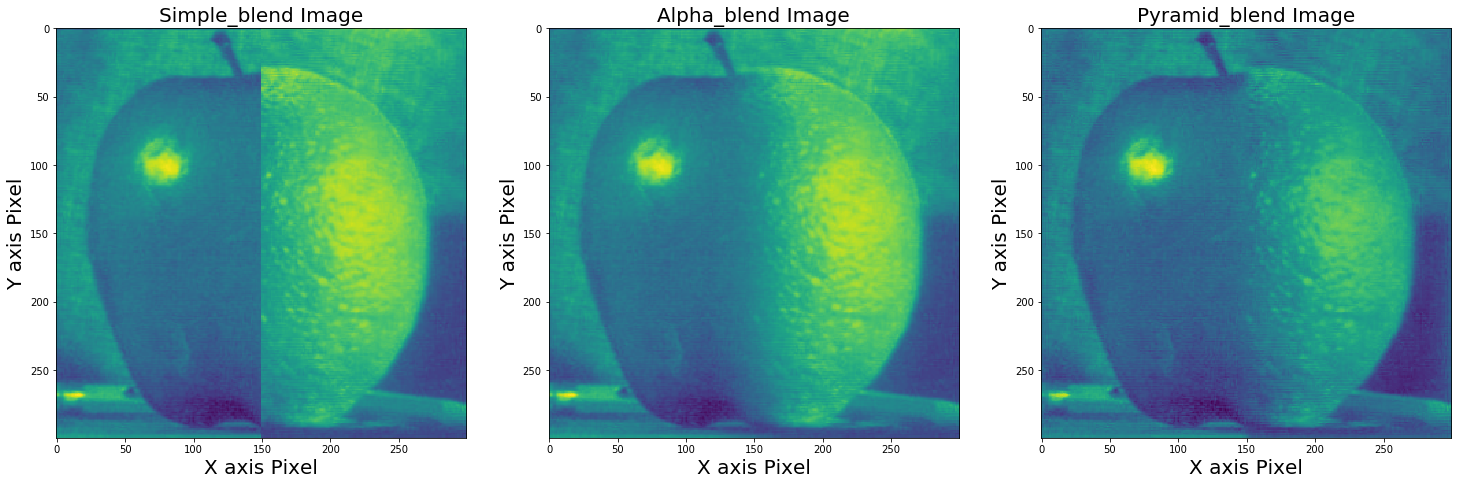

In [4]:
#Function of the simple blending
def simple_blend(image1, image2):
    first_image=img_as_float(image1)
    second_image=img_as_float(image2)
    size_1=first_image.shape
    size_2=second_image.shape
    if (size_1 != size_2):
        print("Hey!! Your target images are not in same dimension!!!!")
    result_simple_blending=np.zeros(size_1)    
    #You can also put size_2 because two images conatain same dimensions.
    result_simple_blending[:,0:int(size_1[1]/2)]=first_image[:,0:int(size_1[1]/2)]
    result_simple_blending[:,int(size_1[1]/2):size_1[1]]=second_image[:,int(size_1[1]/2):size_1[1]]
    return result_simple_blending
    
#Function of the Alpha blending
def alpha_blend(image1, image2):
    first_image=image1
    second_image=image2
    row_image_1, column_image_1=first_image.shape
    row_image_2, column_image_2=second_image.shape
    if (first_image.shape!=second_image.shape ):
        print("Hey!! Your target images are not in same dimension!!!!")
    result_alpha_blending=np.zeros(first_image.shape)
    #defining a ractangular window for the alpha blending
    window=int (0.20*column_image_1) # 20% pixel is considered in the window
    first_image_span=int(column_image_1/2-window/2)
    second_image_span=int(column_image_2/2+window/2)
    window_span=np.arange(first_image_span,second_image_span)
    alpha_value=(window_span/(first_image_span-second_image_span))-(second_image_span/(first_image_span-second_image_span))
    d=alpha_value.shape
    print(d)
    result_alpha_blending[:,0:first_image_span]=first_image[:,0:first_image_span]
    result_alpha_blending[:,second_image_span:column_image_2]=second_image[:,second_image_span:column_image_2]
    result_alpha_blending[:,window_span]=alpha_value*first_image[:,window_span]+(1-alpha_value)*second_image[:,window_span]
    return result_alpha_blending

#Function of the Pyramid Blending
def piramid_blend(image1, image2):
    first_image=image1
    second_image=image2
    row_image_1, column_image_1=first_image.shape
    row_image_2, column_image_2=second_image.shape
    if (first_image.shape!=second_image.shape ):
        print("Hey!! Your target images are not in same dimension!!!!")
            
    result_pyramid_blending1=np.zeros(first_image.shape)
    
    #defining a ractangular window for the alpha blending
    window=int (0.01*column_image_1) # 1% pixel from the column is considered in the window
    result_pyramid_blending1[:,1:int(column_image_1/2) -window] = 1
    first_image_span = int(column_image_1/2-window)
    second_image_span = int(column_image_2/2+window)
    window_span= np.arange(first_image_span,second_image_span)
    result_pyramid_blending1 [:, first_image_span : second_image_span] = (window_span - second_image_span)/( first_image_span - second_image_span)
      
    #mask_gaussian = list(transform.pyramid_gaussian(mask))
    first_image_laplacian_Pyramid = list( transform.pyramid_laplacian(first_image))
    second_image_laplacian_Pyramid = list(transform.pyramid_laplacian(second_image))


    blended = []
    for i in range(len(second_image_laplacian_Pyramid)):
        temporary_image_1 = first_image_laplacian_Pyramid[i] * transform.resize(result_pyramid_blending1, first_image_laplacian_Pyramid[i].shape)
        temporary_image_2 = second_image_laplacian_Pyramid[i] * (1 - transform.resize(result_pyramid_blending1,second_image_laplacian_Pyramid[i].shape))
        blended.append( temporary_image_1 + temporary_image_2 )
    
    result_pyramid_blending = blended[len(blended)-1]
    
    for i in range(len(blended)-1, 0, -1):
        result_pyramid_blending = transform.resize(result_pyramid_blending, blended[i-1].shape) + blended[i-1]
    
    return result_pyramid_blending

#importing the image of the apple
img_path = './images/'
img_name = 'apple.jpeg'
apple_grey_path = img_path.__add__(img_name)
apple = io.imread(apple_grey_path, as_grey=True)

#import the image of the orrange
img_name = 'orange.jpeg'
orange_grey_path = img_path.__add__(img_name)
orange = io.imread(orange_grey_path, as_grey=True)

#definig the subplot to show the apple and orrange images 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 20))
ax0, ax1= axes.ravel()

#showing the images
ax0.imshow(apple)
ax1.imshow(orange)

#axix and title of the apple and orrage images
ax0.set_title('Original Apple',fontsize=20)
ax0.set_xlabel('X axis Pixel',fontsize=20)
ax0.set_ylabel('Y axis Pixel',fontsize=20)
ax1.set_title('Original Orange',fontsize=20)
ax1.set_xlabel('X axis Pixel',fontsize=20)
ax1.set_ylabel('Y axis Pixel',fontsize=20)

#definig the subplot to show the apple and orrange images 
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(25, 10))
ax0, ax1, ax2 = axes.ravel()

#function of the siple blending
simpleblend=simple_blend(apple, orange)

#function of the alpha_blending
alphablend=alpha_blend(apple, orange)

#function of the Pyramid_blending
pyramidblend=piramid_blend(apple,orange)

#ploting of the blending immages
ax0.imshow(simpleblend)
ax1.imshow(alphablend)
ax2.imshow(pyramidblend)

#axix and title of the blending images of apple and orrage
ax0.set_title('Simple_blend Image',fontsize=20)
ax0.set_xlabel('X axis Pixel',fontsize=20)
ax0.set_ylabel('Y axis Pixel',fontsize=20)
ax1.set_title('Alpha_blend Image',fontsize=20)
ax1.set_xlabel('X axis Pixel',fontsize=20)
ax1.set_ylabel('Y axis Pixel',fontsize=20)
ax2.set_title('Pyramid_blend Image',fontsize=20)
ax2.set_xlabel('X axis Pixel',fontsize=20)
ax2.set_ylabel('Y axis Pixel',fontsize=20)